# メディア調査実習入門5 Vol.2 
2022.5.13

＜ID-POS分析＞


---



```
この授業では、小売様の協力を得て、本物のID-POSデータを使って分析を行います。
データの取り扱いにはご注意ください。
```










## 前回の授業
* データの読み込み
* データの前処理
* データの抽出
* データの集計

前回の内容は、内容を詰め込み過ぎていたため、難しかったと思います。

この授業ではPythonを用いますが、主な目的はID-POSの分析ですので、前処理の部分は、「こんなことをやっているんだ」という程度の理解度で良いです。

従って、前処理済みのデータを用意しましたので、今後はそれを使って分析を進めていきます。


```
39d_2年分(前処理済).csv
39d_2020年度(前処理済).csv
39d_2021年度(前処理済).csv
```



### 本日のGOAL
* queryを使ってデータの抽出ができるようになる
* groupby/pivot_tableを使ってデータの集計ができるようになる

In [ ]:
# google driveのマウント

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


＜写経＞ここからは、コードを実際に書いて動かしてみよう

ライブラリーのインポート

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

```



In [ ]:
# ライブラリーのインポート



＜写経＞データの読み込み


```
file = '/content/drive/MyDrive/メディア調査実習入門/D39/39d_2年分(前処理済).csv'

df = pd.read_csv(file, encoding = 'cp932')
```



In [ ]:
# データの読み込み
file = '/content/drive/MyDrive/メディア調査実習入門/D39/39d_2年分(前処理済).csv'



＜写経＞データの確認


```
df.head()
```



In [ ]:
#データの確認

ここでこのデータの構造をもう一度おさらいします

## 1.抽出　 queryを使ったデータの抽出

### 抽出：1つの条件
＜写経＞大分類:食品のレコードを抽出する


```
food = df.query('大分類名 == "食品"')
food.head()
```



In [ ]:
#大分類:食品のレコードを抽出する


###抽出：OR条件
＜写経＞年代が10代・20代のレコードを抽出する


```
u20s = df.query('年代区分 == ("10代","20代")' )
u20s.head()
```



In [ ]:
# 年代が10代・20代のレコードを抽出する


### 抽出：AND条件
＜写経＞年代が20代で中分類名が菓子類のレコードを抽出する


```
kashi = df.query('年代区分 == "20代" and 中分類名 == "菓子類"')
kashi.head()
```



In [ ]:
# 年代が20代で中分類名が菓子類のレコードを抽出する


###  抽出：文字列
＜写経＞商品名に「ポテトチップ」がつくレコードを抽出する


```
potechi = df.query('商品名.str.contains("ポテトチップ")', engine='python')        
potechi.head()
```
engine = 'python' をつけないとエラーになる


In [ ]:
#商品名に「ポテトチップ」がつくレコードを抽出する



### 抽出：文字列（複数条件）
＜写経＞商品名に「ポテトチップ」かつ「湖池屋」がつくレコードを抽出する


```
koikeya = df.query('商品名.str.contains("ポテトチップ") and 商品名.str.contains("湖池屋")', engine='python')
```



In [ ]:
# 商品名に「ポテトチップ」かつ「湖池屋」がつくレコードを抽出する



## 2-1. 集計　groupbyを使った集計

### 店舗ごとの合計値を出す
＜写経＞


```
df.groupby('店舗名').sum()
```



In [ ]:
# 店舗ごとの合計値を出す


### 大分類名ごとの合計値を出す
＜写経＞

```
df.groupby('大分類名').sum()


```



In [ ]:
#大分類名ごとの合計値を出す


### 店舗別・年度別の合計を出す
＜写経＞

```
df.groupby(['店舗名', '年度']).sum()
```



In [ ]:
#店舗別・年度別の合計を出す


## 2-2. pivot_tableを使った集計




### 店舗名×年度　の合計金額を出す
＜写経＞

```
df.pivot_table(index = '店舗名', columns = '年度', values = '金額', aggfunc = 'sum')
```

In [ ]:
#店舗名×年度　の合計金額を出す


### 大分類名×店舗名　の金額合計を出す
＜写経＞

```
df.pivot_table(index = '大分類名', columns = '店舗名', values = '金額', aggfunc = 'sum')
```



In [ ]:
#大分類名×店舗名　の金額合計を出す


### 店舗名×年度　の購入者数を出す
＜写経＞

```
df.pivot_table(index = '店舗名', columns = '年度', values = '顧客ID', aggfunc = 'nunique')
```



In [ ]:
#店舗名×年度　の購入者数を出す


### 大分類名×(店舗名・年度)　の金額合計を出す
＜写経＞

```
df.pivot_table(index = '大分類名', columns = ['店舗名', '年度'], values = '金額', aggfunc = 'sum')
```


In [ ]:
#大分類名×(店舗名・年度)　の金額合計を出す


### （店舗名・大分類名）×年度　の金額合計を出す
＜写経＞

```
df.pivot_table(index = ['店舗名','大分類名'], columns = '年度', values = '金額', aggfunc = 'sum')
```


In [ ]:
#大分類名×(店舗名・年度)　の金額合計を出す


## 3.練習問題
ここからは、各チームで相談してすすめよう

### 練習問題①
　**アイスクリームの売上上位10アイテムを表示する**

<手順>
* 小分類名が"アイスクリーム類"のレコードをqueryで抽出する
* 抽出したものを商品名ごとにgroupbyで集計する
* 金額の降順に並べ替える

金額を降順に並べ替える方法は下記を参照
```
データフレーム名.sort_values('金額', ascending = False) 

```


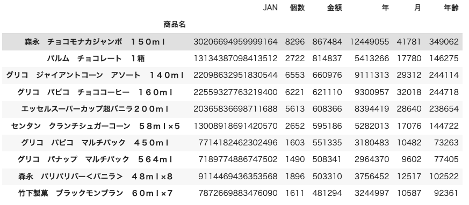

In [ ]:
# アイスクリームの売上上位10アイテムを表示する


### 練習問題②　　
**小分類名が殺虫剤のレコードを抽出し、殺虫剤に含まれる品目別に年月別×品目別の金額を出す**

＜手順＞
* 小分類名が殺虫剤のレコードをqueryで抽出する
* pivot_table で index:年月、columns：品目、values:金額、aggfunc:'sum'を指定する


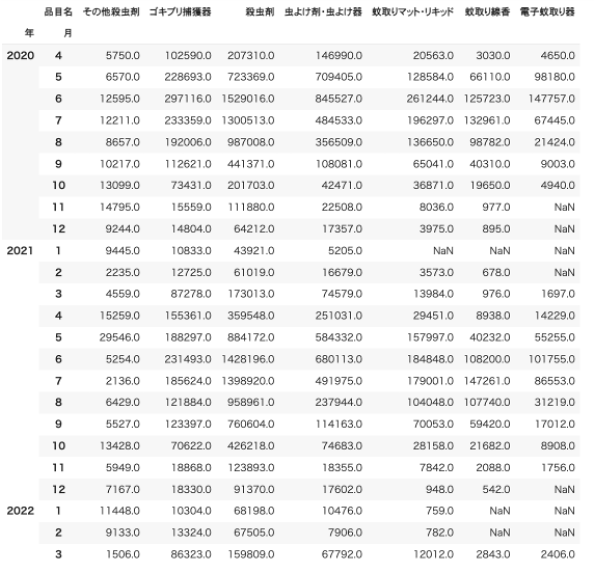

In [ ]:
# 小分類名が殺虫剤のレコードを抽出し、殺虫剤に含まれる年月別×品目別の金額を出す


### 練習問題③ 
**商品名に「糖質」というレコードを抽出し、商品ごとの売上を年度で比較する**

＜手順＞
* 商品名に「糖質」とつくものをstr.contains()で抽出する
* pivot_tableで商品×年度で集計する

In [ ]:
#商品名に「糖質」というレコードを抽出し、商品ごとの売上を年度で比較する




## 4.売上の因数分解

**<重要>**

売上の因数分解は、4つの指標で計算をすることができます。

* 金額
* 個数
* 客数（ユニークな顧客ID数）
* レシート数




以下の計算は4つの指標の組み合わせです。
* 客単価 = 金額 ÷ 客数
* 購入頻度 = レシート数 ÷ 客数
* 1回当り客単価 = 金額 ÷ レシート数
* 1回当り購入点数 = 個数 ÷ レシート数
* 個数単価 = 金額 ÷ 個数

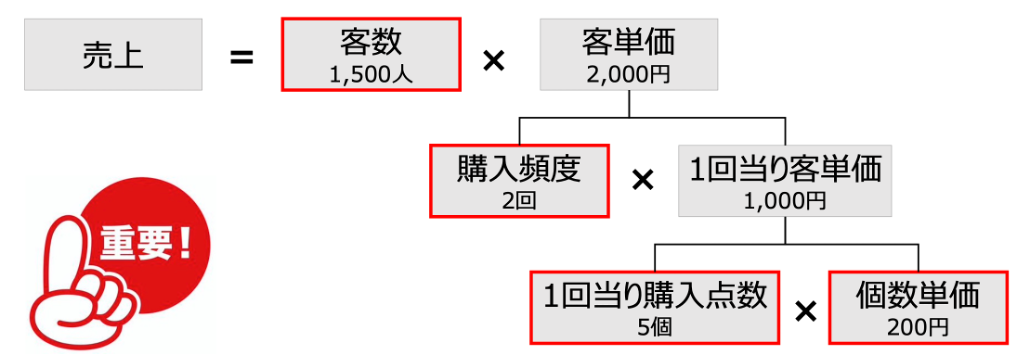

ここから先のコードはわからなくても良いです

In [ ]:
# 店舗別の売上因数分解
# 手順①　因数分解に必要な4つの指標を算出する

factor = df.groupby(['店舗名','年度']).agg(
    val = ('金額', 'sum'),
    vol = ('個数', 'sum'),
    man = ('顧客ID', 'nunique'),
    receipt = ('レシート', 'nunique'),
)

factor


val      vol    man  receipt
店舗名     年度                                        
ＳＤ一枝薬局  2020年度  624929966  1958932  21266   294272
        2021年度  637077513  1974273  21781   302543
ＳＤ千代ヶ崎  2020年度  582456623  1770780  18354   289018
        2021年度  563241208  1682663  17826   277314
ＳＤ朝日ヶ丘店 2020年度  186082073   389293  13762   119687
        2021年度  175396620   348903  13084   110532
ＳＤ桜町薬局  2020年度  328292210  1136067   8280   172369
        2021年度  303540671  1043638   7877   160718

In [ ]:
# 手順②

factor['客単価'] = factor['val'] / factor['man']
factor['購入頻度'] = factor['receipt'] / factor['man']
factor['1回当り単価']= factor['val'] / factor['receipt']
factor['1回当り購入点数']= factor['vol'] / factor['receipt']
factor['個数単価'] = factor['val'] / factor['vol']

factor.head()


val      vol    man  receipt           客単価       購入頻度  \
店舗名     年度                                                                    
ＳＤ一枝薬局  2020年度  624929966  1958932  21266   294272  29386.342801  13.837675   
        2021年度  637077513  1974273  21781   302543  29249.231578  13.890225   
ＳＤ千代ヶ崎  2020年度  582456623  1770780  18354   289018  31734.587719  15.746867   
        2021年度  563241208  1682663  17826   277314  31596.612140  15.556715   
ＳＤ朝日ヶ丘店 2020年度  186082073   389293  13762   119687  13521.441142   8.696919   

                     1回当り単価  1回当り購入点数        個数単価  
店舗名     年度                                         
ＳＤ一枝薬局  2020年度  2123.647394  6.656875  319.015650  
        2021年度  2105.742037  6.525595  322.689675  
ＳＤ千代ヶ崎  2020年度  2015.295321  6.126885  328.926588  
        2021年度  2031.059406  6.067717  334.732034  
ＳＤ朝日ヶ丘店 2020年度  1554.739220  3.252592  478.000049

In [ ]:
# 手順③　売上の因数分解で必要な項目だけを表示する

factor = factor.rename(columns = {'val': '売上', 'man': '客数'})
factor[['売上', '客数', '客単価', '購入頻度', '1回当り単価', '1回当り購入点数','個数単価']]

売上     客数           客単価       購入頻度       1回当り単価  \
店舗名     年度                                                               
ＳＤ一枝薬局  2020年度  624929966  21266  29386.342801  13.837675  2123.647394   
        2021年度  637077513  21781  29249.231578  13.890225  2105.742037   
ＳＤ千代ヶ崎  2020年度  582456623  18354  31734.587719  15.746867  2015.295321   
        2021年度  563241208  17826  31596.612140  15.556715  2031.059406   
ＳＤ朝日ヶ丘店 2020年度  186082073  13762  13521.441142   8.696919  1554.739220   
        2021年度  175396620  13084  13405.428004   8.447875  1586.840191   
ＳＤ桜町薬局  2020年度  328292210   8280  39648.817633  20.817512  1904.589630   
        2021年度  303540671   7877  38535.060429  20.403453  1888.653860   

                1回当り購入点数        個数単価  
店舗名     年度                            
ＳＤ一枝薬局  2020年度  6.656875  319.015650  
        2021年度  6.525595  322.689675  
ＳＤ千代ヶ崎  2020年度  6.126885  328.926588  
        2021年度  6.067717  334.732034  
ＳＤ朝日ヶ丘店 2020年度  3.252592  478.000049  
        2021年度  3.156579  502.708833  
ＳＤ桜町薬局  2020年度  6.590901  288.972578  
        2021年度  6.493597  290.848619

### 関数を使った売上の因数分解

売上の因数分解の関数をつくり、自動化する

In [ ]:
# insuという名前の関数を作成する


def insu(df_name, col):  #　insuという関数をつくる。
    factor = df_name.groupby(col).agg(
        val = ('金額', 'sum'),
        vol = ('個数', 'sum'),
        man = ('顧客ID', 'nunique'),
        receipt = ('レシート', 'nunique'),
    )

    factor['客単価'] = (factor['val'] / factor['man'])
    factor['購入頻度'] = factor['receipt'] / factor['man']
    factor['1回当り単価']= factor['val'] / factor['receipt']
    factor['1回当り購入点数']= factor['vol'] / factor['receipt']
    factor['個数単価'] = factor['val'] / factor['vol']

    factor = factor.rename(columns = {'val': '売上', 'man': '客数'})
    output = factor[['売上', '客数', '客単価', '購入頻度', '1回当り単価', '1回当り購入点数','個数単価']]
    return output


因数分解の関数を定義しておくと、引数(カッコの中)を設定するだけで、因数分解をしてくれる

insu(df_name, col) 

> df_name >> データフレーム名 （queryで抽出したデータフレーム名を入れる）　\
> col >> ['カラム名']



In [ ]:
# insu()の中に、集計したい項目を入れる

insu(df, '年度')

In [ ]:
# 食品の因数分解
insu(food, ['店舗名', '年度'])

In [ ]:
# 20代以下の因数分解
insu(u20s, ['大分類名','年度'])

In [ ]:
# ポテトチップスの因数分解
insu(potechi, ['店舗名', '年度'])

In [ ]:
# 湖池屋の因数分解
insu(potechi, ['店舗名', '年度'])

## 5.解答

In [ ]:
#練習問題1の解答
# アイスクリームの売上上位10アイテムを表示する
icecream = df.query('小分類名 == "アイスクリーム類"')
ice_item= icecream.groupby('商品名').sum()
ice_rank = ice_item.sort_values('金額', ascending = False)
ice_rank.head(10)

In [ ]:
#練習問題2の解答
# 小分類名が殺虫剤のレコードを抽出し、殺虫剤に含まれる年月別×品目別の金額を出す
insect =df.query('小分類名 == "殺虫剤"')
insect.pivot_table(index = ['年', '月'], columns = '品目名', values = '金額', aggfunc ='sum')

In [ ]:
#練習問題3の解答
carbo = df.query('商品名.str.contains("糖質")', engine  = 'python')
carbo_sku = carbo.pivot_table(index = '商品名', columns = '年度', values = '金額', aggfunc = 'sum')
carbo_rank = carbo_sku.sort_values('2021年度',ascending = False)
carbo_rank.head(20)